In [1]:
!python -m pip install multiple-hypothesis-testing

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive/')
    # import glob; print(glob.glob('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis/*'))
    import sys
    sys.path.append('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis')
except:
    pass

In [3]:
from Higher_Criticism import Higher_Criticism, Benjamini_Hochberg, Bonferroni, Lowest_Angle, Berk_Jones, Extreme_P_Values_Discovery_Method
from Higher_Analysis import AUC_per_gamma_single_size

In [4]:
import numpy as np

N=10000
monte_carlo = 1000
chunk_size = 100
beta_range=list(np.arange(0.5,1.0,0.1))
r_range=list(np.arange(0.00,1.05,0.05))
gamma = [0.1, 0.2, 0.3, 0.4, 0.5]
gamma_power = list(-np.arange(0.1,0.8,0.1))
gamma_range = gamma + gamma_power + ['logsqrt']

major_models = [Higher_Criticism(gamma=gamma_range),\
                Benjamini_Hochberg(alpha=0.5, gamma=gamma_range, selection_method=Extreme_P_Values_Discovery_Method.Selection_Method_ArgMin),\
                Benjamini_Hochberg(alpha=0.1, gamma=gamma_range, selection_method=Extreme_P_Values_Discovery_Method.Selection_Method_ArgMin),\
                Bonferroni(alpha=1, gamma=gamma_range, selection_method=Extreme_P_Values_Discovery_Method.Selection_Method_ArgMin),\
                Lowest_Angle(gamma=gamma_range, selection_method=Extreme_P_Values_Discovery_Method.Selection_Method_ArgMin),\
                Berk_Jones(gamma=gamma_range, selection_method=Extreme_P_Values_Discovery_Method.Selection_Method_ArgMin)]


100%|██████████| 8190/8190 [01:47<00:00, 75.90it/s]


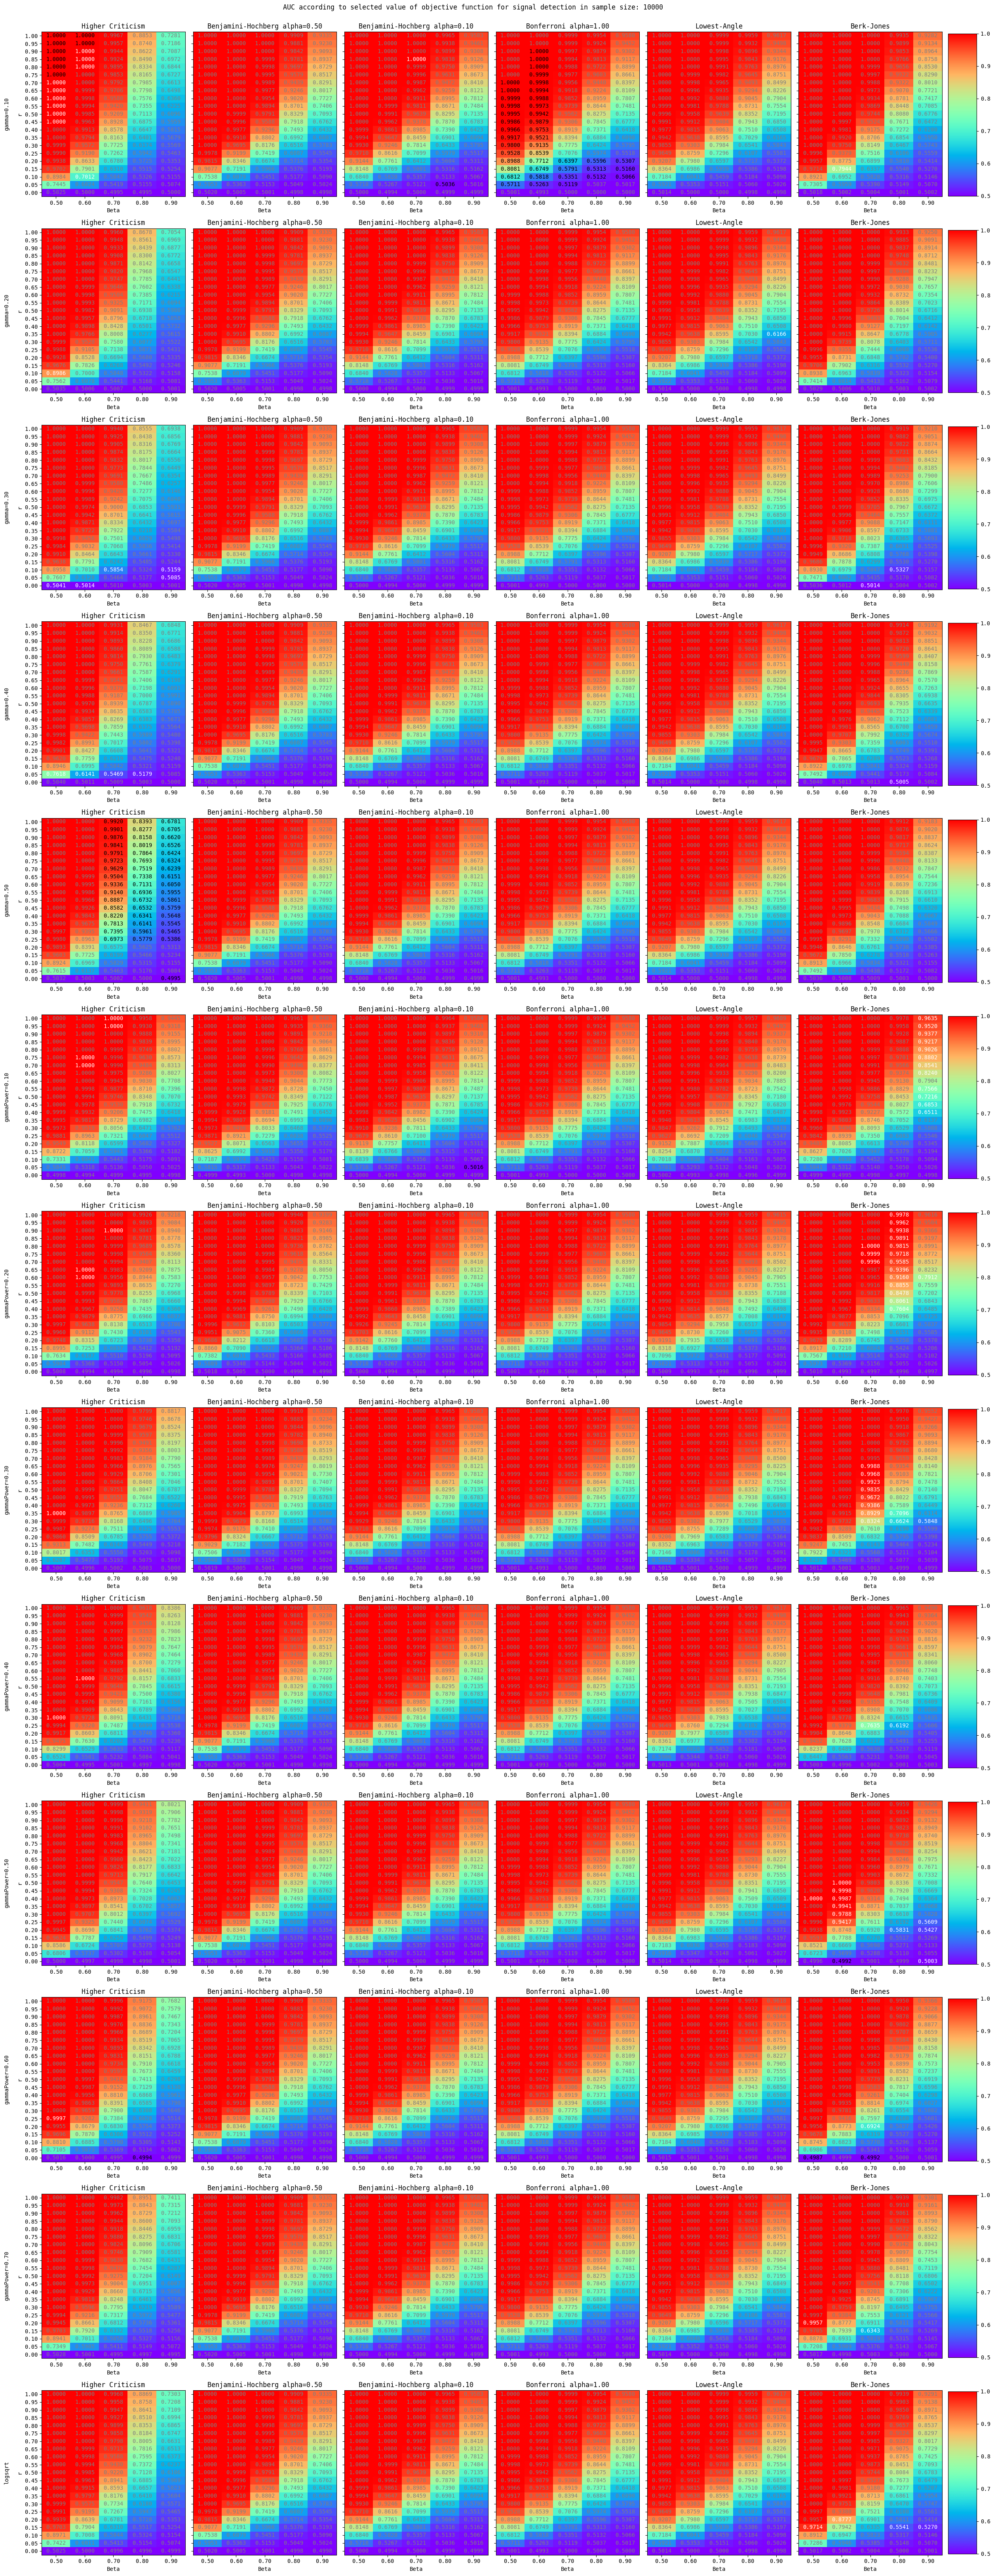

In [5]:

AUC_per_gamma_single_size(N=N, beta_range=beta_range, r_range=r_range,\
                              major_models=major_models,\
                              monte_carlo=monte_carlo, chunk_size=chunk_size)
